In [484]:
import pandas as pd
from functions import data_treatment, request, product_pricing, df_to_all_df, format_all_df
import seaborn as sns
import matplotlib.pyplot as plt

In [485]:
product_database = {}
weeks = 15
all_df = pd.DataFrame([])
all_jsons = []

for week in range(weeks):
    json = data_treatment(request())
    json, product_database = product_pricing(json, product_database)
    all_jsons.append(json)

In [541]:
def df_to_analysis(all_jsons:list, time:str, column_name:str):
    new_json = {}
    n = 0
    for week in range(len(all_jsons)):
        for transaction in range(len(all_jsons[week])):
            new_json[n] = {}
            if (time=='week'):
                new_json[n]['date'] = f'Week {week+1}'
            elif (time=='month'):
                new_json[n]['date']=all_jsons[week][transaction]['date']
            new_json[n]['id'] = all_jsons[week][transaction]['id']
            for i in range(0,21):
                new_json[n][f'prod_{i}'] = 0
            for key in all_jsons[week][transaction]:
                if ('prod' in key):
                    if (type(all_jsons[week][transaction][key][column_name])==list): #teste
                        new_json[n][key] = float(all_jsons[week][transaction][key][column_name][0])
                    else:
                        new_json[n][key] = float(all_jsons[week][transaction][key][column_name])
            n += 1
    df = pd.DataFrame(new_json).T
    if (time=='month'):
        df['date'] = pd.to_datetime(df['date']).dt.month_name()
    return df

In [544]:
def df_to_analysis(all_jsons:list, column_name:str):
    new_json = {}
    n = 0
    for week in range(len(all_jsons)):
        for transaction in range(len(all_jsons[week])):
            new_json[n] = {}
            new_json[n]['date'] = all_jsons[week][transaction]['date']
            new_json[n]['week'] = f'Week {week+1}'
            new_json[n]['month']=all_jsons[week][transaction]['date']
            new_json[n]['id'] = all_jsons[week][transaction]['id']
            for i in range(0,21):
                new_json[n][f'prod_{i}'] = 0
            for key in all_jsons[week][transaction]:
                if ('prod' in key):
                    if (type(all_jsons[week][transaction][key][column_name])==list): #teste
                        new_json[n][key] = float(all_jsons[week][transaction][key][column_name][0])
                    else:
                        new_json[n][key] = float(all_jsons[week][transaction][key][column_name])
            n += 1
    df = pd.DataFrame(new_json).T
    df['date'] = pd.to_datetime(df['date']).dt.date
    df['month'] = pd.to_datetime(df['month']).dt.month_name()


    return df

In [542]:
sum_all_prods = {f'prod_{i}':'sum' for i in range(20)}

#### Dataframe - Quantidades de produtos vendidos 

In [545]:
all_qnt= df_to_analysis(all_jsons=all_jsons, column_name='qnt')
all_qnt.head()

,date,week,month,id,prod_0,prod_1,prod_2,prod_3,prod_4,prod_5,...,prod_11,prod_12,prod_13,prod_14,prod_15,prod_16,prod_17,prod_18,prod_19,prod_20
0,2023-01-12,Week 1,January,lagvoo85n5fbki2fri,40.0,23.0,45.0,0,5.0,0,...,0,0,0,0,1257.270645,0,0,0,0,0
1,2023-01-12,Week 1,January,lagvoo8mst5uu7iunb,18.0,35.0,41.0,0,36.0,0,...,722.144589,0,0,0,950.898063,0,0,0,0,0
2,2023-01-12,Week 1,January,lagvoo8nsyl9jvp693,20.0,28.0,0,0,21.0,38.0,...,0,0,0,0,1294.041511,0,0,0,0,0
3,2023-01-11,Week 1,January,lagvoo8po6vyg4uh0i,0,44.0,31.0,0,14.0,39.0,...,369.375024,0,0,0,1293.079816,0,0,0,0,0
4,2023-01-12,Week 1,January,lagvoo8r656i81g0cnn,0,0,24.0,28.0,0,40.0,...,0,0,0,0,1307.473657,0,0,0,0,0


In [496]:
all_qnt= df_to_analysis(all_jsons=all_jsons, time='week', column_name='qnt')
all_qnt.head()

,date,id,prod_0,prod_1,prod_2,prod_3,prod_4,prod_5,prod_6,prod_7,...,prod_11,prod_12,prod_13,prod_14,prod_15,prod_16,prod_17,prod_18,prod_19,prod_20
0,Week 1,lagvoo85n5fbki2fri,40.0,23.0,45.0,0,5.0,0,5.0,10.0,...,0,0,0,0,1257.270645,0,0,0,0,0
1,Week 1,lagvoo8mst5uu7iunb,18.0,35.0,41.0,0,36.0,0,0,0,...,722.144589,0,0,0,950.898063,0,0,0,0,0
2,Week 1,lagvoo8nsyl9jvp693,20.0,28.0,0,0,21.0,38.0,35.0,0,...,0,0,0,0,1294.041511,0,0,0,0,0
3,Week 1,lagvoo8po6vyg4uh0i,0,44.0,31.0,0,14.0,39.0,0,0,...,369.375024,0,0,0,1293.079816,0,0,0,0,0
4,Week 1,lagvoo8r656i81g0cnn,0,0,24.0,28.0,0,40.0,17.0,0,...,0,0,0,0,1307.473657,0,0,0,0,0


#### Agrupamento - Semana

In [551]:
weekly_qnt= all_qnt.groupby('week', sort=False).agg(sum_all_prods)
weekly_qnt.head()

,prod_0,prod_1,prod_2,prod_3,prod_4,prod_5,prod_6,prod_7,prod_8,prod_9,prod_10,prod_11,prod_12,prod_13,prod_14,prod_15,prod_16,prod_17,prod_18,prod_19
week,,,,,,,,,,,,,,,,,,,,
Week 1,340.0,348.0,436.0,336.0,486.0,538.0,183.0,159.0,8629.0,8011.514385,2542.576864,6592.814759,0,0,0,39419.772466,0,0,0,0
Week 2,142.0,186.0,218.0,124.0,153.0,63.0,123.0,94.0,1980.0,4827.954649,2555.972350,2320.767701,0,0,0,11634.322294,0,0,0,0
Week 3,191.0,266.0,195.0,281.0,163.0,141.0,74.0,172.0,3846.0,2926.899368,4552.788780,4575.040640,0,0,0,17799.631211,0,0,0,0
Week 4,0.0,2.0,0.0,37.0,0.0,31.0,46.0,0.0,5.0,10.929094,618.583152,0.000000,0,0,0,2725.231797,0,0,0,0
Week 5,272.0,313.0,310.0,297.0,285.0,306.0,358.0,277.0,4006.0,3054.180850,4473.285275,4485.907488,0,0,0,16057.463476,0,0,0,0


In [497]:
weekly_qnt= all_qnt.groupby('date', sort=False).agg(sum_all_prods)
weekly_qnt.head()

,prod_0,prod_1,prod_2,prod_3,prod_4,prod_5,prod_6,prod_7,prod_8,prod_9,prod_10,prod_11,prod_12,prod_13,prod_14,prod_15,prod_16,prod_17,prod_18,prod_19
date,,,,,,,,,,,,,,,,,,,,
Week 1,340.0,348.0,436.0,336.0,486.0,538.0,183.0,159.0,8629.0,8011.514385,2542.576864,6592.814759,0,0,0,39419.772466,0,0,0,0
Week 2,142.0,186.0,218.0,124.0,153.0,63.0,123.0,94.0,1980.0,4827.954649,2555.972350,2320.767701,0,0,0,11634.322294,0,0,0,0
Week 3,191.0,266.0,195.0,281.0,163.0,141.0,74.0,172.0,3846.0,2926.899368,4552.788780,4575.040640,0,0,0,17799.631211,0,0,0,0
Week 4,0.0,2.0,0.0,37.0,0.0,31.0,46.0,0.0,5.0,10.929094,618.583152,0.000000,0,0,0,2725.231797,0,0,0,0
Week 5,272.0,313.0,310.0,297.0,285.0,306.0,358.0,277.0,4006.0,3054.180850,4473.285275,4485.907488,0,0,0,16057.463476,0,0,0,0


In [547]:
weekly_qnt_to_boxplot = weekly_qnt.T
weekly_qnt_to_boxplot=weekly_qnt_to_boxplot.agg({f'Week {i+1}':'sum' for i in range(weeks)}).to_frame().rename(columns={0:'QUANTITIES'})
weekly_qnt_to_boxplot

,QUANTITIES
Week 1,68021.678475
Week 2,24422.016994
Week 3,35183.360000
Week 4,3475.744043
Week 5,34494.837089
Week 6,24458.477288
Week 7,23166.422439
Week 8,7616.705267
Week 9,29953.207731
Week 10,60824.056444


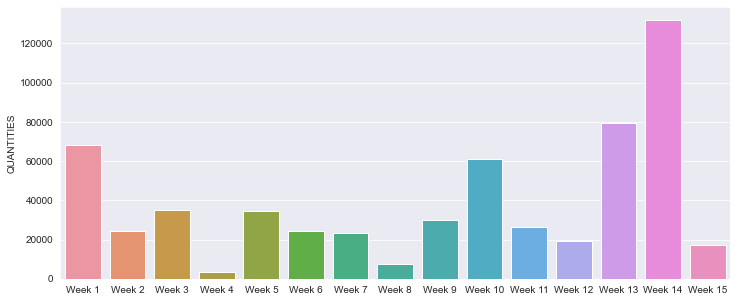

In [495]:
fig, ax = plt.subplots(figsize=(12, 5))
sns.barplot(x=weekly_qnt_to_boxplot.index, y=weekly_qnt_to_boxplot['QUANTITIES'])
sns.set_style('darkgrid')

#### DataFrame - Preço dos produtos - Semana

In [548]:
all_prices= df_to_analysis(all_jsons=all_jsons, column_name='price')
all_prices.head()

,date,week,month,id,prod_0,prod_1,prod_2,prod_3,prod_4,prod_5,...,prod_11,prod_12,prod_13,prod_14,prod_15,prod_16,prod_17,prod_18,prod_19,prod_20
0,2023-01-12,Week 1,January,lagvoo85n5fbki2fri,79.29,23.7,37.93,0,38.15,0,...,0,0,0,0,36.72,0,0,0,0,0
1,2023-01-12,Week 1,January,lagvoo8mst5uu7iunb,79.29,23.7,37.93,0,38.15,0,...,52.97,0,0,0,36.72,0,0,0,0,0
2,2023-01-12,Week 1,January,lagvoo8nsyl9jvp693,79.29,23.7,0,0,38.15,89.3,...,0,0,0,0,36.72,0,0,0,0,0
3,2023-01-11,Week 1,January,lagvoo8po6vyg4uh0i,0,23.7,37.93,0,38.15,89.3,...,52.97,0,0,0,36.72,0,0,0,0,0
4,2023-01-12,Week 1,January,lagvoo8r656i81g0cnn,0,0,37.93,2.65,0,89.3,...,0,0,0,0,36.72,0,0,0,0,0


#### Agrupamento preços semanais

In [549]:
weekly_price= all_prices.groupby('week', sort=False).agg(sum_all_prods)
weekly_price.head()

,prod_0,prod_1,prod_2,prod_3,prod_4,prod_5,prod_6,prod_7,prod_8,prod_9,prod_10,prod_11,prod_12,prod_13,prod_14,prod_15,prod_16,prod_17,prod_18,prod_19
week,,,,,,,,,,,,,,,,,,,,
Week 1,1268.640000,379.200000,606.880000,34.45000,763.000000,1696.700000,199.68,224.240000,1798.320000,2626.290000,567.000,900.490000,0,0,0,1138.32,0,0,0,0
Week 2,396.450000,142.200000,303.440000,13.25000,190.750000,446.500000,61.44,168.180000,449.580000,875.430000,243.000,158.910000,0,0,0,403.92,0,0,0,0
Week 3,832.545000,391.050000,398.265000,43.72500,343.350000,669.745907,69.12,252.269928,1910.715000,1896.765000,1336.500,874.005000,0,0,0,991.44,0,0,0,0
Week 4,0.000000,53.325000,85.342500,5.96250,0.000000,401.847544,34.56,0.000000,168.592500,437.715000,364.500,0.000000,0,0,0,247.86,0,0,0,0
Week 5,1005.994527,656.461987,853.103982,116.26875,528.032074,3315.241127,673.92,323.301329,3497.989739,4235.346488,3007.125,549.866166,0,0,0,2478.60,0,0,0,0


#### DataFrame - Quantidade de produtos - Mensal

In [550]:
monthly_qnt = df_to_analysis(all_jsons=all_jsons, column_name='qnt')
monthly_qnt.head()

,date,week,month,id,prod_0,prod_1,prod_2,prod_3,prod_4,prod_5,...,prod_11,prod_12,prod_13,prod_14,prod_15,prod_16,prod_17,prod_18,prod_19,prod_20
0,2023-01-12,Week 1,January,lagvoo85n5fbki2fri,40.0,23.0,45.0,0,5.0,0,...,0,0,0,0,1257.270645,0,0,0,0,0
1,2023-01-12,Week 1,January,lagvoo8mst5uu7iunb,18.0,35.0,41.0,0,36.0,0,...,722.144589,0,0,0,950.898063,0,0,0,0,0
2,2023-01-12,Week 1,January,lagvoo8nsyl9jvp693,20.0,28.0,0,0,21.0,38.0,...,0,0,0,0,1294.041511,0,0,0,0,0
3,2023-01-11,Week 1,January,lagvoo8po6vyg4uh0i,0,44.0,31.0,0,14.0,39.0,...,369.375024,0,0,0,1293.079816,0,0,0,0,0
4,2023-01-12,Week 1,January,lagvoo8r656i81g0cnn,0,0,24.0,28.0,0,40.0,...,0,0,0,0,1307.473657,0,0,0,0,0


#### Agrupamento por quantidade mensal

In [533]:
monthly_qnt=monthly_qnt.groupby('date').agg(sum_all_prods)
monthly_qnt.head()

,prod_0,prod_1,prod_2,prod_3,prod_4,prod_5,prod_6,prod_7,prod_8,prod_9,prod_10,prod_11,prod_12,prod_13,prod_14,prod_15,prod_16,prod_17,prod_18,prod_19
date,,,,,,,,,,,,,,,,,,,,
April,1100.0,887.0,971.0,1033.0,1006.0,919.0,899.0,967.0,23772.0,23144.626315,19692.491435,22085.568552,0,0,0,132018.446379,0,0,0,0
February,570.0,498.0,582.0,542.0,679.0,539.0,602.0,503.0,10878.0,9832.218602,11636.345618,10660.440328,0,0,0,38073.476311,0,0,0,0
January,673.0,800.0,849.0,741.0,802.0,742.0,380.0,425.0,14455.0,15766.368402,9651.337994,13488.623101,0,0,0,68853.725972,0,0,0,0
March,722.0,974.0,905.0,690.0,965.0,1191.0,850.0,812.0,15638.0,15348.816288,14142.618779,12312.450925,0,0,0,79357.763768,0,0,0,0


#### DataFrame - Preços - Mensal

In [535]:
monthly_price = df_to_analysis(all_jsons=all_jsons, time='month', column_name='price')
monthly_price.head()

,date,id,prod_0,prod_1,prod_2,prod_3,prod_4,prod_5,prod_6,prod_7,...,prod_11,prod_12,prod_13,prod_14,prod_15,prod_16,prod_17,prod_18,prod_19,prod_20
0,January,lagvoo85n5fbki2fri,79.29,23.7,37.93,0,38.15,0,15.36,28.03,...,0,0,0,0,36.72,0,0,0,0,0
1,January,lagvoo8mst5uu7iunb,79.29,23.7,37.93,0,38.15,0,0,0,...,52.97,0,0,0,36.72,0,0,0,0,0
2,January,lagvoo8nsyl9jvp693,79.29,23.7,0,0,38.15,89.3,15.36,0,...,0,0,0,0,36.72,0,0,0,0,0
3,January,lagvoo8po6vyg4uh0i,0,23.7,37.93,0,38.15,89.3,0,0,...,52.97,0,0,0,36.72,0,0,0,0,0
4,January,lagvoo8r656i81g0cnn,0,0,37.93,2.65,0,89.3,15.36,0,...,0,0,0,0,36.72,0,0,0,0,0


#### Agrupamento preço mensal

In [536]:
monthly_price= monthly_price.groupby('date', sort=False).agg(sum_all_prods)
monthly_price.head()

,prod_0,prod_1,prod_2,prod_3,prod_4,prod_5,prod_6,prod_7,prod_8,prod_9,prod_10,prod_11,prod_12,prod_13,prod_14,prod_15,prod_16,prod_17,prod_18,prod_19
date,,,,,,,,,,,,,,,,,,,,
January,2497.635000,912.450000,1308.585000,91.425000,1297.100000,2812.945907,330.240000,644.689928,4158.615000,5398.485000,2146.500000,1933.405000,0,0,0,2533.680000,0,0,0,0
February,2103.443103,1842.183888,1889.985538,263.095310,1320.080185,10498.263554,1486.079612,678.932789,11724.451458,16157.366386,9727.593750,1466.309775,0,0,0,7466.782500,0,0,0,0
March,14275.405278,24288.065921,13787.062650,2520.459564,9776.843812,104324.135009,13887.442166,6546.851867,118689.602714,153663.664751,79808.414062,9897.590983,0,0,0,74503.230469,0,0,0,0
April,93364.043684,81598.340543,62789.272428,13065.442712,40410.696074,368829.682937,67426.538426,28724.312547,504279.287285,745218.950182,332799.356689,56108.902007,0,0,0,356527.366963,0,0,0,0


#### Consolidate (Preços x Quantidades)

In [522]:
def consolidate(df_qnt, df_price, df_consolidate):
    for prod in df_qnt.columns:
        df_consolidate[prod]=df_qnt[prod]*df_price[prod]
    return df_consolidate

#### Consolidado Semanal

In [525]:
df_consolidate_week = pd.DataFrame([])
df_consolidate_week = consolidate(weekly_qnt, weekly_price, df_consolidate_week)
df_consolidate_week.head()

,prod_0,prod_1,prod_2,prod_3,prod_4,prod_5,prod_6,prod_7,prod_8,prod_9,prod_10,prod_11,prod_12,prod_13,prod_14,prod_15,prod_16,prod_17,prod_18,prod_19
date,,,,,,,,,,,,,,,,,,,,
Week 1,431337.600000,131961.600000,264599.68000,11575.200000,370818.000000,9.128246e+05,36541.440000,35654.160000,1.551770e+07,2.104056e+07,1.441641e+06,5.936764e+06,0,0,0,4.487232e+07,0,0,0,0
Week 2,56295.900000,26449.200000,66149.92000,1643.000000,29184.750000,2.812950e+04,7557.120000,15808.920000,8.901684e+05,4.226536e+06,6.211013e+05,3.687932e+05,0,0,0,4.699335e+06,0,0,0,0
Week 3,159016.095000,104019.300000,77661.67500,12286.725000,55966.050000,9.443417e+04,5114.880000,43390.427650,7.348610e+06,5.551640e+06,6.084802e+06,3.998608e+06,0,0,0,1.764727e+07,0,0,0,0
Week 4,0.000000,106.650000,0.00000,220.612500,0.000000,1.245727e+04,1589.760000,0.000000,8.429625e+02,4.783828e+03,2.254736e+05,0.000000e+00,0,0,0,6.754760e+05,0,0,0,0
Week 5,273630.511468,205472.601936,264462.23451,34531.818748,150489.141106,1.014464e+06,241263.359992,89554.468022,1.401295e+07,1.293551e+07,1.345173e+07,2.466649e+06,0,0,0,3.980003e+07,0,0,0,0


#### Consolidado Mensal

In [537]:
df_consolidate_month = pd.DataFrame([])
df_consolidate_month= consolidate(monthly_qnt, monthly_price, df_consolidate_month)
df_consolidate_month.head()

,prod_0,prod_1,prod_2,prod_3,prod_4,prod_5,prod_6,prod_7,prod_8,prod_9,prod_10,prod_11,prod_12,prod_13,prod_14,prod_15,prod_16,prod_17,prod_18,prod_19
date,,,,,,,,,,,,,,,,,,,,
April,1.027004e+08,7.237773e+07,6.096838e+07,1.349660e+07,4.065316e+07,3.389545e+08,6.061646e+07,2.777641e+07,1.198773e+10,1.724781e+10,6.553648e+09,1.239197e+09,0,0,0,4.706819e+10,0,0,0,0
February,1.198963e+06,9.174076e+05,1.099972e+06,1.425977e+05,8.963344e+05,5.658564e+06,8.946199e+05,3.415032e+05,1.275386e+08,1.588628e+08,1.131936e+08,1.563151e+07,0,0,0,2.842864e+08,0,0,0,0
January,1.680908e+06,7.299600e+05,1.110989e+06,6.774592e+04,1.040274e+06,2.087206e+06,1.254912e+05,2.739932e+05,6.011278e+07,8.511450e+07,2.071660e+07,2.607897e+07,0,0,0,1.744533e+08,0,0,0,0
March,1.030684e+07,2.365658e+07,1.247729e+07,1.739117e+06,9.434654e+06,1.242500e+08,1.180433e+07,5.316044e+06,1.856068e+09,2.358555e+09,1.128700e+09,1.218636e+08,0,0,0,5.912410e+09,0,0,0,0
